В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задание 1.
Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

Построить точечный график
Рассчитать коэффициенты корреляции Пирсона и Спирмена
Построить модель линейной регрессии
Рассчитать коэффициент детерминации
Вывести график остатков
Задание 2.
Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

Разделить данные на 2 группы
Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

<Axes: xlabel='hardness', ylabel='mortality'>

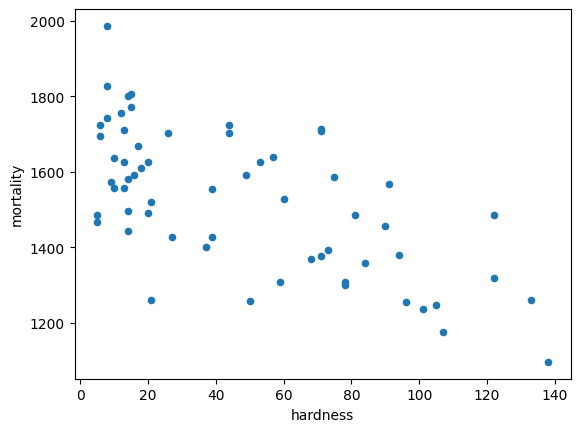

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/water.csv")

data.plot(kind='scatter', x='hardness', y='mortality')

In [ ]:
data[['hardness', 'mortality']].corr() # Пирсон

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [ ]:
data[['hardness', 'mortality']].corr(method='spearman') # Спирмен

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['hardness']]
Y = data['mortality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

r2 = model.score(X_test, Y_test)
print('Коэффициент детерминации:', r2)

Коэффициент детерминации: 0.5046490611017092


In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              mortality   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     26.31
Date:                Fri, 05 May 2023   Prob (F-statistic):           7.83e-06
Time:                        23:08:13   Log-Likelihood:                -269.10
No. Observations:                  42   AIC:                             542.2
Df Residuals:                      40   BIC:                             545.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1668.9723     36.543     45.671      0.0

Text(0, 0.5, 'Остатки')

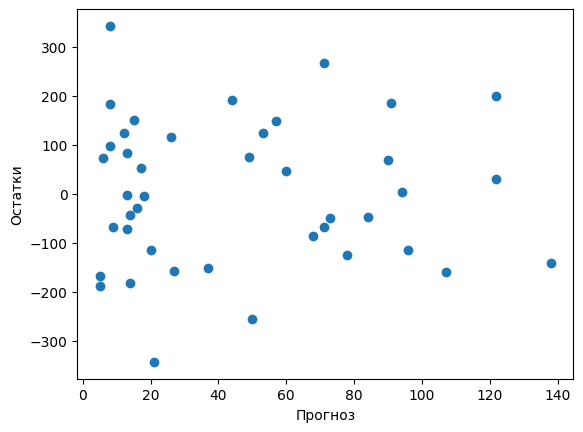

In [ ]:
plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

(array([1., 0., 1., 0., 2., 5., 3., 2., 5., 3., 2., 2., 5., 3., 2., 4., 0.,
        1., 0., 1.]),
 array([-3.43207209e+02, -3.08892795e+02, -2.74578382e+02, -2.40263968e+02,
        -2.05949554e+02, -1.71635140e+02, -1.37320726e+02, -1.03006312e+02,
        -6.86918979e+01, -3.43774840e+01, -6.30700817e-02,  3.42513439e+01,
         6.85657578e+01,  1.02880172e+02,  1.37194586e+02,  1.71509000e+02,
         2.05823414e+02,  2.40137827e+02,  2.74452241e+02,  3.08766655e+02,
         3.43081069e+02]),
 <BarContainer object of 20 artists>)

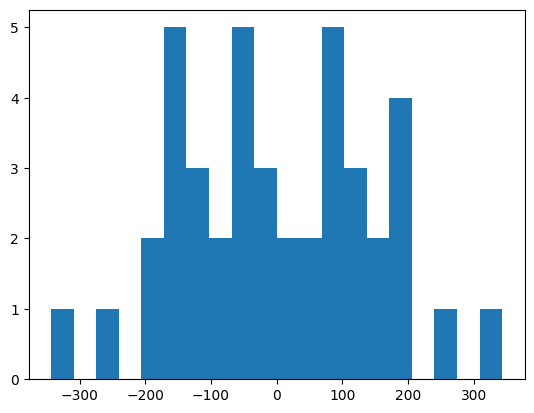

In [ ]:
plt.hist(results.resid, bins=20)

**Вывод:** существует значимая обратная зависимость между жёсткостью воды и средней годовой смертностью - коэффициент Пирсона -0.654849, коэффициент Спирмена -0.631665.


---




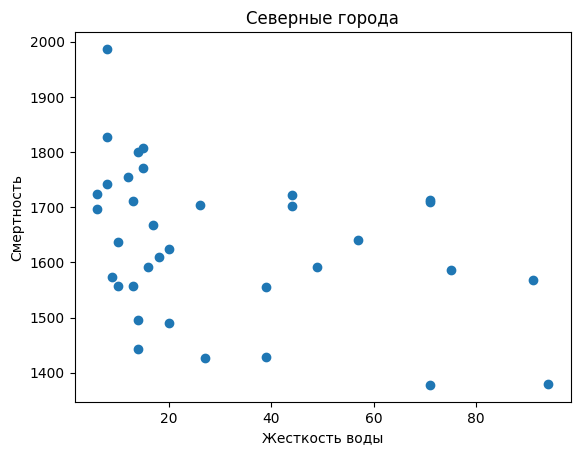

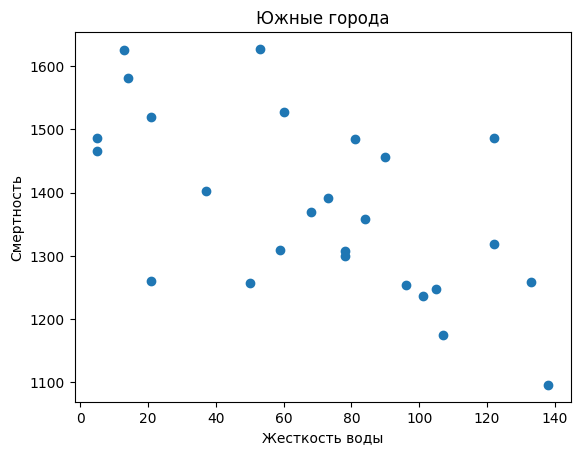

Коэффициент корреляции Пирсона для северных городов: -0.3685978383288718
Коэффициент корреляции Спирмена для северных городов: -0.4042078956511175
Коэффициент корреляции Пирсона для южных городов: -0.6021532715484156
Коэффициент корреляции Спирмена для южных городов: -0.5957229185013566


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/water.csv")

north = data[data['location'] == 'North']
south = data[data['location'] == 'South']

plt.scatter(north['hardness'], north['mortality'])
plt.title('Северные города')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.show()

plt.scatter(south['hardness'], south['mortality'])
plt.title('Южные города')
plt.xlabel('Жесткость воды')
plt.ylabel('Смертность')
plt.show()

print('Коэффициент корреляции Пирсона для северных городов:', north['hardness'].corr(north['mortality'], method='pearson'))
print('Коэффициент корреляции Спирмена для северных городов:', north['hardness'].corr(north['mortality'], method='spearman'))

print('Коэффициент корреляции Пирсона для южных городов:', south['hardness'].corr(south['mortality'], method='pearson'))
print('Коэффициент корреляции Спирмена для южных городов:', south['hardness'].corr(south['mortality'], method='spearman'))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#северные
X = north[['hardness']]
Y = north['mortality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

r2 = model.score(X_test, Y_test)
print('Коэффициент детерминации:', r2)

Коэффициент детерминации: 0.018885304285745863


Text(0, 0.5, 'Остатки')

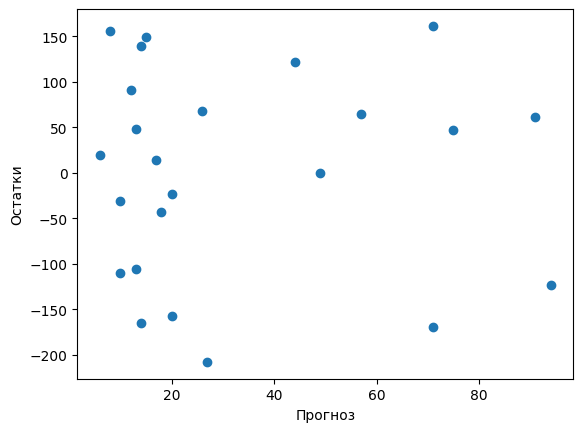

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_const)
results = model.fit()

plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

Коэффициент детерминации: -2.5519223012352077


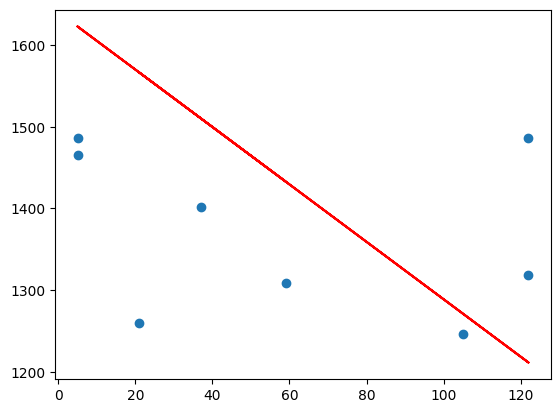

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#южные
X = south[['hardness']]
Y = south['mortality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, Y_train)

predictions = model.predict(X_test)

r2 = model.score(X_test, Y_test)
print('Коэффициент детерминации:', r2)
plt.scatter(X_test, Y_test)
plt.plot(X_test, predictions, c='r')

Text(0, 0.5, 'Остатки')

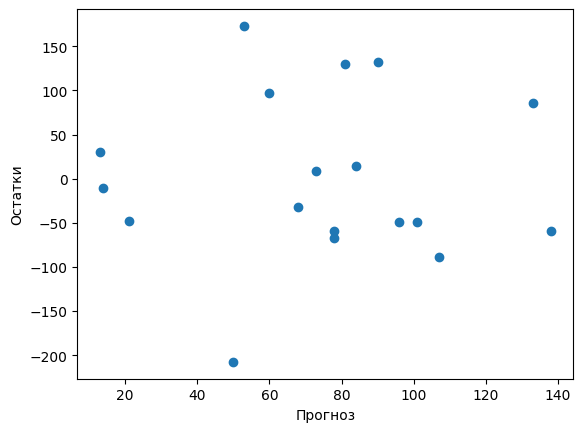

In [ ]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=42)
X_const = sm.add_constant(X_train)

model = sm.OLS(Y_train, X_const)
results = model.fit()

plt.scatter(x=X_const.iloc[:, 1], y=results.resid)
plt.xlabel('Прогноз')
plt.ylabel('Остатки')

**Вывод:** наиболее сильная обратная зависимость обнаруживается только для южных городов, для северных городов значимой корреляции не выявлено.